In [1]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
from functions import generate_single_exp, stretch_exp_fit, double_exp_fit, single_exp_fit

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate random array of lifetime values

In [3]:
seed(10)
tau_vals = randint(1,1000,100)*1e-9 # convert to s

Text(0.5, 0, 'Tau values (ns)')

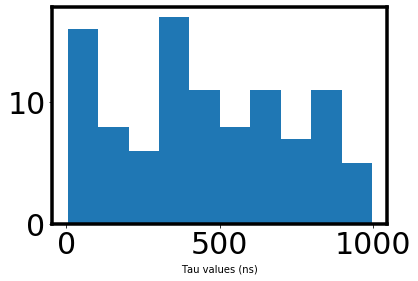

In [4]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [5]:
t = np.linspace(0,10000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [6]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

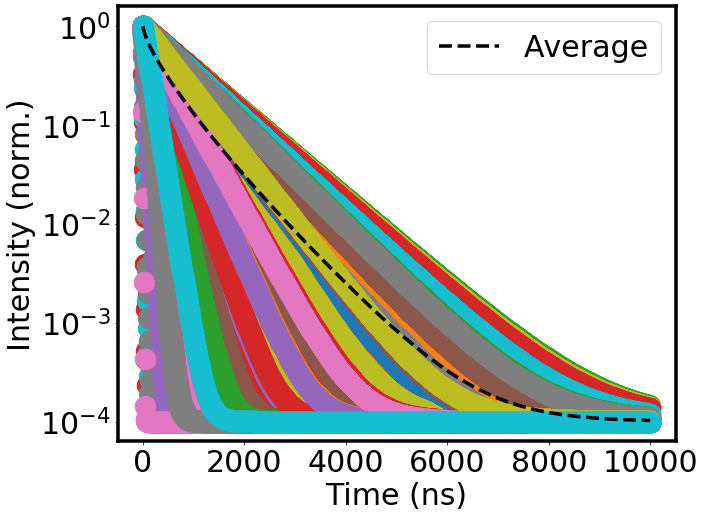

In [7]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Fit average decay with stretched exponential, double exponential and single exponential 

Margherita ---- can you write a function for fitting it with single exponential and fit it? You can refer to my fit functions in the directory labeled "functions.py"

In [8]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 410.11820144240187
Beta = 0.7828463475732753
avg. tau (ns) = 472.10769635808225


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)


In [9]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 245.35327557551884
a1 = 0.4519808425270824
tau2 (ns) = 746.3309890127839
a2 = 0.463271484576714
avg. tau (ns) = 498.9321872821358


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [12]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(double_exp[2]*1e9))

tau (ns) = 611.610513052276
a = 0.752651124734003
avg. tau (ns) = 746.3309890127839


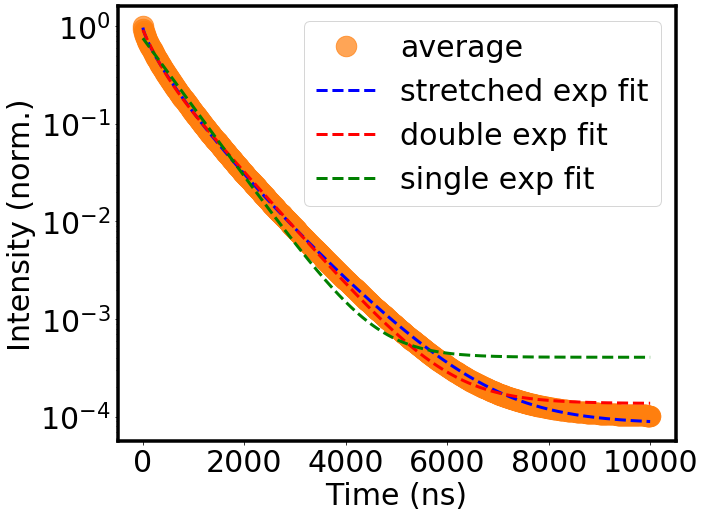

In [14]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()